In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Set the working directory dynamically
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..', '..', '..'))
study1_dir = os.path.join(project_root, 'study1')
os.chdir(study1_dir)

# Add the project root to the Python path
sys.path.append(project_root)

# Set pandas display option
pd.set_option('display.max_columns', None)

# Set a modern style
plt.style.use('seaborn-v0_8-pastel')

# Print current working directory for verification
print(f"Current working directory: {os.getcwd()}")


Current working directory: c:\Users\Ryo\OneDrive\Desktop\Master Thesis\master_thesis\study1


In [3]:
# dial the target models to True
run_flag = {'gpt35'       : True,
            'gpt4'        : False,
            'gpt4o'       : True,
            'gemini_old'  : False,
            'gemini'      : False,  #ultra
            'claude'      : True}   #sonnet

In [4]:
target_folder = 'transformed'
version = 'original'   # 'original' or 'exactDist'

In [5]:
file_paths = {}

if version == 'exactDist':
    for model_name in run_flag.keys():
        file_paths[f'{model_name}_result_accuracy'] = f'{target_folder}/{model_name}_result_accuracy_exactDist.xlsx'
        file_paths[f'{model_name}_result_justification'] = f'{target_folder}/{model_name}_result_justification_exactDist.xlsx'
else:
   for model_name in run_flag.keys():
        file_paths[f'{model_name}_result_accuracy'] = f'{target_folder}/{model_name}_result_accuracy.xlsx'
        file_paths[f'{model_name}_result_justification'] = f'{target_folder}/{model_name}_result_justification.xlsx'


def load_from_excel(variable_name):
    if variable_name in file_paths:
        globals()[variable_name] = pd.read_excel(file_paths[variable_name])
        return variable_name, globals()[variable_name]
    else:
        print(f"File path for {variable_name} does not exist.")

accuracy_dfs = {}
justification_dfs = {}

# Load and save DataFrames based on the run flags
for model_name, flag in run_flag.items():
    if flag:
        accuracy_table_name = f"{model_name}_result_accuracy"
        justification_table_name = f"{model_name}_result_justification"
        
        # Load the DataFrames if they exist in file_paths
        accuracy_table_name, accuracy_table = load_from_excel(accuracy_table_name)
        justification_table_name, justification_table = load_from_excel(justification_table_name)

        accuracy_dfs[accuracy_table_name] = accuracy_table
        justification_dfs[justification_table_name] = justification_table

        print(f"loaded {accuracy_table_name}")
        print(f"loaded {justification_table_name}")


loaded gpt35_result_accuracy
loaded gpt35_result_justification
loaded gpt4o_result_accuracy
loaded gpt4o_result_justification
loaded claude_result_accuracy
loaded claude_result_justification


# TASK0: DESCRIPTIVE ANALYSIS

In [6]:
def calculate_accuracy_per_mbti_type(df):
    mbti_types = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP',
                  'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']
    
    accuracy_dict = {}
    
    for mbti_type in mbti_types:
        type_df = df[df['type'] == mbti_type]
        
        if len(type_df) > 0:
            accuracy_1st = (type_df['is matched 1st full'].sum() / len(type_df)) * 100
            accuracy_dict[mbti_type] = {
                '1st Choice': f"{accuracy_1st:.1f}%",
                'Sample Size': len(type_df)
            }
        else:
            accuracy_dict[mbti_type] = {
                '1st Choice': 'N/A',
                'Sample Size': 0
            }
    
    accuracy_table = pd.DataFrame.from_dict(accuracy_dict, orient='index')
    accuracy_table.index.name = 'MBTI Type'
    
    return accuracy_table

def plot_mbti_accuracy(accuracy_table, model_name, version):
    # Convert percentage strings to floats
    accuracy_table['1st Choice'] = accuracy_table['1st Choice'].str.rstrip('%').astype('float') / 100

    # Sort the data by 1st Choice accuracy
    sorted_data = accuracy_table.sort_values('1st Choice', ascending=False)

    # Set up the plot
    plt.figure(figsize=(8, 8))
    
    # Create the horizontal bar plot
    sns.set_style("whitegrid")
    ax = sns.barplot(x='1st Choice', y=sorted_data.index, data=sorted_data, 
                     color='#66b3ff')

    # Customize the plot
    if version == 'exactDist':
        plt.title(f'[Sample Distriution] MBTI Type Accuracy (1st Choice) for {model_name}', fontsize=16)
    else:
        plt.title(f'[Uniformed Distribution] MBTI Type Accuracy (1st Choice) for {model_name}', fontsize=16)
    
    plt.xlabel('Accuracy', fontsize=12)
    plt.ylabel('MBTI Type', fontsize=12)
    
    # Add percentage labels
    for i, v in enumerate(sorted_data['1st Choice']):
        ax.text(v, i, f' {v:.1%}', va='center', fontweight='bold')

    # Show sample size
    for i, n in enumerate(sorted_data['Sample Size']):
        ax.text(1.01, i, f"n={n}", va='center')

    plt.xlim(0, 1.1)  # Set x-axis limit to accommodate sample size text
    plt.tight_layout()
    plt.show()


Accuracy per MBTI type for gpt35:
          1st Choice  Sample Size
MBTI Type                        
ISTJ            0.0%           39
ISFJ            0.0%           39
INFJ            7.7%           39
INTJ            0.0%           39
ISTP            2.6%           39
ISFP            0.0%           38
INFP           30.8%           39
INTP           43.6%           39
ESTP            0.0%           39
ESFP            5.1%           39
ENFP           66.7%           39
ENTP           68.4%           38
ESTJ            0.0%           39
ESFJ            0.0%           39
ENFJ            2.7%           37
ENTJ            0.0%           39


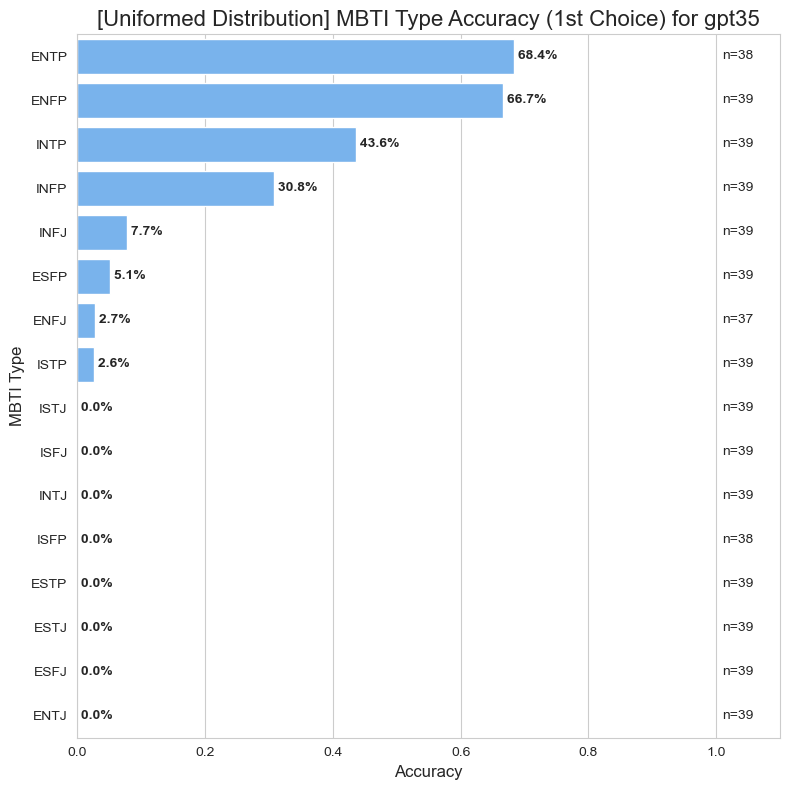

New variable created: gpt35_accuracy_per_mbti_type

Accuracy per MBTI type for gpt4o:
          1st Choice  Sample Size
MBTI Type                        
ISTJ           12.8%           39
ISFJ           20.5%           39
INFJ           20.5%           39
INTJ           12.8%           39
ISTP           15.4%           39
ISFP           10.3%           39
INFP           76.9%           39
INTP           30.8%           39
ESTP            7.7%           39
ESFP           10.3%           39
ENFP           74.4%           39
ENTP           69.2%           39
ESTJ            7.7%           39
ESFJ            5.1%           39
ENFJ            7.7%           39
ENTJ           15.4%           39


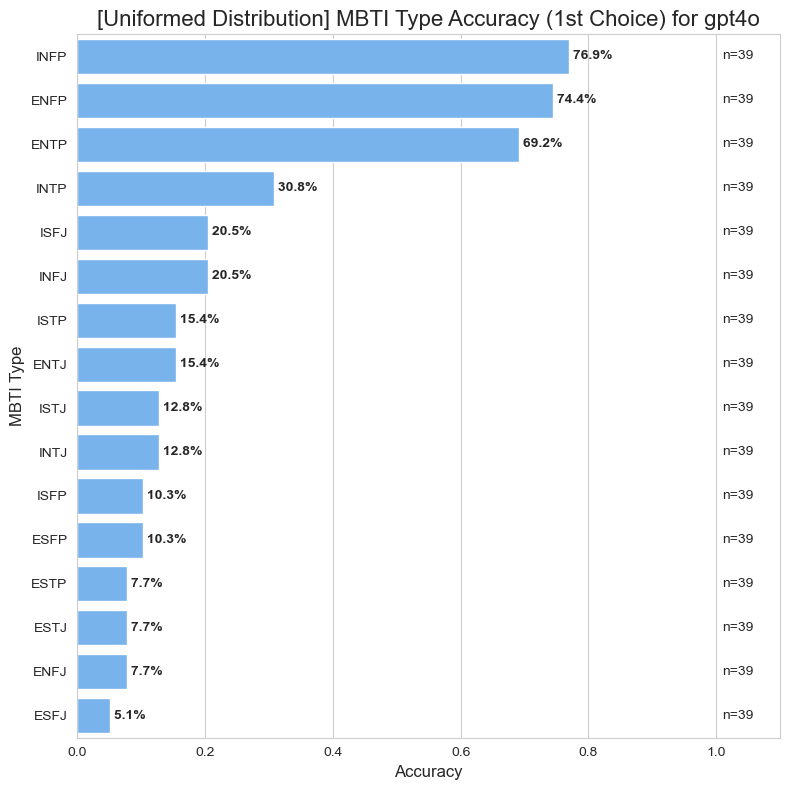

New variable created: gpt4o_accuracy_per_mbti_type

Accuracy per MBTI type for claude:
          1st Choice  Sample Size
MBTI Type                        
ISTJ            5.1%           39
ISFJ           20.5%           39
INFJ           17.9%           39
INTJ            5.1%           39
ISTP           15.4%           39
ISFP            5.1%           39
INFP           82.1%           39
INTP           43.6%           39
ESTP           23.1%           39
ESFP            5.1%           39
ENFP           74.4%           39
ENTP           84.6%           39
ESTJ            5.1%           39
ESFJ            5.1%           39
ENFJ           10.3%           39
ENTJ           10.3%           39


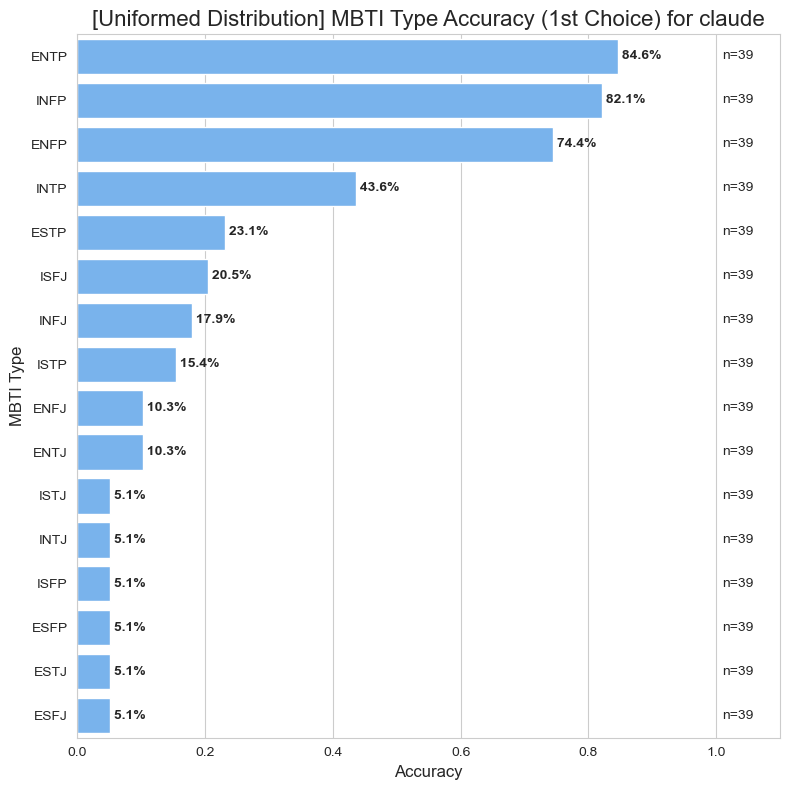

New variable created: claude_accuracy_per_mbti_type


In [7]:
# Add this to your existing loop
for accuracy_df_name, accuracy_df in accuracy_dfs.items():
    model_name = accuracy_df_name.split('_')[0]
    if run_flag.get(model_name, False):
        print(f"\nAccuracy per MBTI type for {model_name}:")
        mbti_accuracy_table = calculate_accuracy_per_mbti_type(accuracy_df)
        print(mbti_accuracy_table)
        
        # Create and display the visualization
        plot_mbti_accuracy(mbti_accuracy_table, model_name, version)
        
        # Optionally, save this table as a new variable
        new_variable_name = f"{model_name}_accuracy_per_mbti_type"
        globals()[new_variable_name] = mbti_accuracy_table
        print(f"New variable created: {new_variable_name}")

# TASK1: PROBABILITY OF COMPLETE CORRECT GUESS OF ALL FOUR DICHOTOMIES
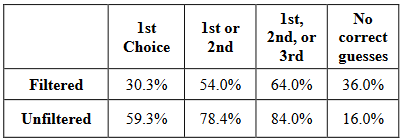

In [8]:
def calculate_accuracy_all (df):
    accuracy_all_cols = ['is matched 1st full', 'is matched 2nd full', 'is matched 3rd full']
    accuracy_all = df[accuracy_all_cols].copy()  # Make a copy to avoid SettingWithCopyWarning

    accuracy_all['1st'] = accuracy_all.iloc[:,0].astype(int)
    accuracy_all['1st or 2nd'] = np.where(accuracy_all.iloc[:,0] + accuracy_all.iloc[:,1] >= 1, 1, 0)
    accuracy_all['1st, 2nd, or 3rd'] = np.where(accuracy_all.iloc[:,0] + accuracy_all.iloc[:,1] + accuracy_all.iloc[:,2] >= 1, 1, 0)
    accuracy_all['no correct guess'] = np.where(accuracy_all.loc[:,'1st, 2nd, or 3rd'] == 0, 1, 0)

    accuracy_all_stmd = accuracy_all.iloc[:,3:]
    accuracy_all_dict = {}
    for col in accuracy_all_stmd.columns.tolist():
        result = round(accuracy_all_stmd[col].sum() / accuracy_all_stmd.shape[0],3)
        accuracy_all_dict[col] = result

    accuracy_all_table = pd.DataFrame([accuracy_all_dict])
    accuracy_all_table = accuracy_all_table.apply(lambda col: col.map(lambda x: f"{x * 100:.1f}%"))

    return accuracy_all_table

In [9]:
# Loop through the run flags
for accuracy_df_name, accuracy_df in accuracy_dfs.items():
    if run_flag:
        print(accuracy_df_name)
        model_name = accuracy_df_name.split('_')[0]
        new_variable_name = f"{model_name}_accuracy_all_table"
        
        globals()[new_variable_name] = calculate_accuracy_all (accuracy_df)

        print(f"calculation done for : {model_name}")
        print(f"new variable created : {new_variable_name}")
        print(globals()[new_variable_name])
        print("")

gpt35_result_accuracy
calculation done for : gpt35
new variable created : gpt35_accuracy_all_table
     1st 1st or 2nd 1st, 2nd, or 3rd no correct guess
0  14.2%      21.8%            29.2%            70.8%

gpt4o_result_accuracy
calculation done for : gpt4o
new variable created : gpt4o_accuracy_all_table
     1st 1st or 2nd 1st, 2nd, or 3rd no correct guess
0  24.8%      40.7%            51.0%            49.0%

claude_result_accuracy
calculation done for : claude
new variable created : claude_accuracy_all_table
     1st 1st or 2nd 1st, 2nd, or 3rd no correct guess
0  25.8%      42.3%            51.3%            48.7%



# TASK2: DICHOTOMY CLASSIFICATION ACCURACY ACROSS PARADIGMS
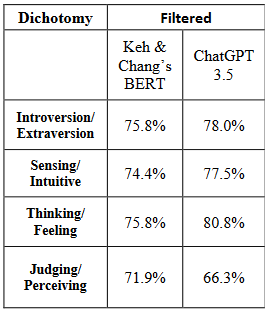

In [10]:
def calculate_accuracy_per_paradigm (df, LLM_name: str):
    selected_cols = ['is matched 1st (EI)',	'is matched 1st (NS)',	'is matched 1st (FT)',	'is matched 1st (JP)']
    accuracy_per_paradigm = df[selected_cols]

    accuracy_per_paradigm_dict = {}
    new_names = ['Introversion/Extraversion', 'Sensing/Intuitive', 'Thinking/Feeling', 'Judging/Perceiving']
    for i, col in enumerate(selected_cols):
        result = round(accuracy_per_paradigm[col].sum() / accuracy_per_paradigm.shape[0],3)
        accuracy_per_paradigm_dict[new_names[i]] = result

    accuracy_per_paradigm_table = pd.DataFrame(list(accuracy_per_paradigm_dict.items()), columns=['paradigm', LLM_name])
    accuracy_per_paradigm_table[LLM_name] = accuracy_per_paradigm_table[LLM_name].apply(lambda x: f"{x * 100:.1f}%")
    
    return accuracy_per_paradigm_table

In [11]:
# Loop through the run flags
for accuracy_df_name, accuracy_df in accuracy_dfs.items():
    if run_flag:
        model_name = accuracy_df_name.split('_')[0]
        new_variable_name = f"{model_name}_accuracy_per_paradigm_table"
        
        globals()[new_variable_name] = calculate_accuracy_per_paradigm (accuracy_df, model_name)

        print(f"calculation done for : {model_name}")
        print(f"new variable created : {new_variable_name}")
        print(globals()[new_variable_name])
        print("")

calculation done for : gpt35
new variable created : gpt35_accuracy_per_paradigm_table
                    paradigm  gpt35
0  Introversion/Extraversion  62.9%
1          Sensing/Intuitive  50.0%
2           Thinking/Feeling  70.5%
3         Judging/Perceiving  53.1%

calculation done for : gpt4o
new variable created : gpt4o_accuracy_per_paradigm_table
                    paradigm  gpt4o
0  Introversion/Extraversion  74.8%
1          Sensing/Intuitive  57.2%
2           Thinking/Feeling  79.6%
3         Judging/Perceiving  61.4%

calculation done for : claude
new variable created : claude_accuracy_per_paradigm_table
                    paradigm claude
0  Introversion/Extraversion  78.8%
1          Sensing/Intuitive  58.2%
2           Thinking/Feeling  83.0%
3         Judging/Perceiving  61.1%



# TASK3: CLASSIFICATION PRECISION, RECALL, AND FSCORE FOR EACH DICHOTOMY TYPE
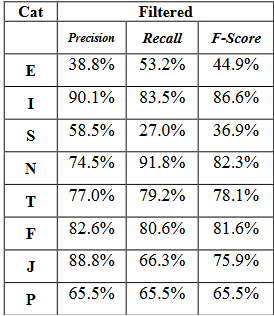

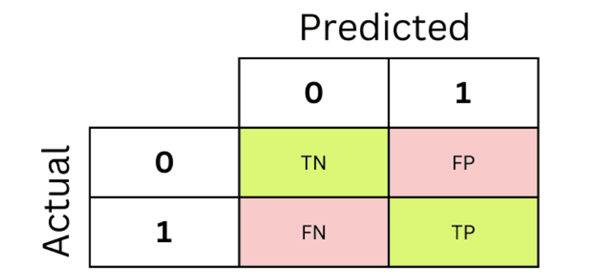

- precision: TP / (TP + FP)
- recall   : TP / (TP + FN)
- F1       : 2 * precision * recall / (precision + recall)

In [12]:
def find_confusion_matrix (df):
    full_paradigm = [['E', 'I'], ['N', 'S'], ['F', 'T'], ['J', 'P']]
    selected_cols = ['type (EI)', 'type (NS)', 'type (FT)', 'type (JP)', '1st choice (EI)', '1st choice (NS)', '1st choice (FT)', '1st choice (JP)']
    f1_per_paradigm = df[selected_cols]
    
    letters = []
    precision_list = []
    recall_list = []
    f1_list = []

    for i, paradigm in enumerate(full_paradigm):
        for j, letter in enumerate(full_paradigm[i]):
            true_stmd_df = f1_per_paradigm[f1_per_paradigm.iloc[:,i] == letter]
            false_stmd_df = f1_per_paradigm[f1_per_paradigm.iloc[:,i] != letter]
            
            true_act_data = true_stmd_df.iloc[:,i].values
            false_act_data = false_stmd_df.iloc[:,i].values

            true_pred_data = true_stmd_df.iloc[:,i + len(full_paradigm)].values
            false_pred_data = false_stmd_df.iloc[:,i + len(full_paradigm)].values

            tp = (true_act_data == true_pred_data).sum()
            tn = (false_act_data == false_pred_data).sum()
            fp = (false_act_data != false_pred_data).sum()
            fn = (true_act_data != true_pred_data).sum()

            precision = np.nan_to_num(tp / (tp + fp), 0)
            recall = np.nan_to_num(tp / (tp + fn), 0)
            #f1 = 2 * precision * recall / (precision + recall)
            f1 = np.nan_to_num((2 * tp) / (2 * tp + fp + fn), 0)

            letters.append(letter)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

            print(f"{full_paradigm[i][j]} : tp [{tp}], fp [{fp}], fn [{fn}], precision [{round(precision,3)}], recall [{round(recall,3)}], f1 [{round(f1,3)}]")

    f1_per_paradigm_dict = {'Cat': letters,
                            'Precision': precision_list,
                            'Recall': recall_list,
                            'F-Score': f1_list}

    f1_per_paradigm_table = pd.DataFrame(f1_per_paradigm_dict)
    f1_per_paradigm_table[["Precision", "Recall", "F-Score"]] = f1_per_paradigm_table[["Precision", "Recall", "F-Score"]].apply(lambda x: (x * 100).map("{:.1f}%".format))
    
    return f1_per_paradigm_table

In [13]:
# Loop through the run flags
for accuracy_df_name, accuracy_df in accuracy_dfs.items():
    if run_flag:
        model_name = accuracy_df_name.split('_')[0]
        new_variable_name = f"{model_name}_fscore_per_paradigm"
        
        print(model_name)
        globals()[new_variable_name] = find_confusion_matrix (accuracy_df)

        print("")
        print(f"new variable created : {new_variable_name}")
        print(globals()[new_variable_name])
        print("")

gpt35
E : tp [248], fp [169], fn [61], precision [0.595], recall [0.803], f1 [0.683]
I : tp [142], fp [61], fn [169], precision [0.7], recall [0.457], f1 [0.553]
N : tp [307], fp [308], fn [2], precision [0.499], recall [0.994], f1 [0.665]
S : tp [3], fp [2], fn [308], precision [0.6], recall [0.01], f1 [0.019]
F : tp [196], fp [70], fn [113], precision [0.737], recall [0.634], f1 [0.682]
T : tp [241], fp [113], fn [70], precision [0.681], recall [0.775], f1 [0.725]
J : tp [26], fp [7], fn [284], precision [0.788], recall [0.084], f1 [0.152]
P : tp [303], fp [284], fn [7], precision [0.516], recall [0.977], f1 [0.676]

new variable created : gpt35_fscore_per_paradigm
  Cat Precision Recall F-Score
0   E     59.5%  80.3%   68.3%
1   I     70.0%  45.7%   55.3%
2   N     49.9%  99.4%   66.5%
3   S     60.0%   1.0%    1.9%
4   F     73.7%  63.4%   68.2%
5   T     68.1%  77.5%   72.5%
6   J     78.8%   8.4%   15.2%
7   P     51.6%  97.7%   67.6%

gpt4o
E : tp [230], fp [75], fn [82], precis